In [1]:
import numpy as np
from shapely.geometry import Polygon
import pygeos
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
xmin, ymin, xmax, ymax = -180, -90, 180, 90
length = 10
width = 10
cols = np.arange(xmin, xmax, width)
rows = np.arange(ymin, ymax, length)

In [3]:
polygons = [Polygon([(x,y), 
                     (x+width, y),
                     (x+width, y+length),
                     (x, y+length)]) for x in cols for y in rows]
grid = gpd.GeoDataFrame({'id': range(len(polygons)),  'geometry':polygons})

In [4]:
grid['color'] = np.nan
grid.loc[grid.id == 0, 'color'] = 1
grid.loc[(grid.id == 1) | (grid.id == 18) | (grid.id == 19), 'color'] = 2

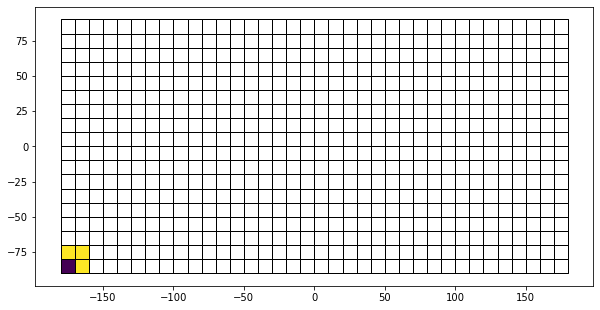

In [5]:
f, ax = plt.subplots(1,1, figsize=(10, 6))
grid.plot(ax=ax, 
          column='color', 
          edgecolor='black', 
          missing_kwds = dict(color='white', label='No Data'))
plt.show()

In [6]:
pygeos_array = pygeos.io.from_shapely(grid.geometry)

In [7]:
tree = pygeos.STRtree(pygeos_array)

In [8]:
neighbors = tree.query_bulk(pygeos_array)

In [9]:
neighbors_df = pd.DataFrame(neighbors.T, columns=['id_i', 'id_j'])
neighbors_df = neighbors_df[neighbors_df.id_i != neighbors_df.id_j].reset_index(drop=True)

In [10]:
neighbors_df

,id_i,id_j
0,0,18
1,0,1
2,0,19
3,1,0
4,1,18
...,...,...
4859,646,647
4860,646,629
4861,647,646
4862,647,628


In [11]:
neighbors_df.groupby('id_i').count().value_counts()

id_j
8       544
5       100
3         4
dtype: int64